In [1]:
import numpy as np
import BasisFunction as bf
import GradientDescent as gd
import LinearRegression as lr
import matplotlib.pyplot as plt

In [2]:
class Generator_2D:
    def __init__(self, function, xRange):
        self.x = np.linspace(xRange[0], xRange[1], xRange[2]).reshape(-1, 1)
        self.y = function(self.x)
        self.function = function
        self.xRange = xRange

    def plot(self, label = None, newFig = False, figsize=(8, 6)):
        if newFig:
            plt.figure(figsize = figsize)
        plt.plot(self.x.ravel(), self.y.ravel(), label = label)
        plt.xlim(xRange[0], xRange[1])
        plt.legend()
        return self
        
    def generateNoisyPoints(self, N, seed = 0, sigma = 0.1):
        np.random.seed(seed)
        xgen = np.random.uniform(self.xRange[0], self.xRange[1], N).reshape(-1, 1)
        ynoise = np.random.normal(0, np.sqrt(sigma), N).reshape(-1, 1)
        ygen = self.function(xgen) + ynoise
        return (xgen, ygen)

In [3]:
NTrainPoints = 20
NTestPoints = 20
Nsigma = 0.1

xRange = (0, 2*np.pi, 500)
# func = lambda x: 1/(1 - np.exp(-x) + 0.0000001)
# func = lambda x: np.add(2*x, 3*np.sin(x))
func = lambda x: np.sin(x)
basisFuncs = [
    lambda x: x,
    lambda x: np.power(x, 2),
    lambda x: np.power(x, 3),
    lambda x: np.power(x, 4),
    lambda x: np.power(x, 5),
    lambda x: np.power(x, 6),
    lambda x: np.power(x, 7),
    lambda x: np.power(x, 8),
#     lambda x: np.power(x, 9),
#     lambda x: np.power(x, 10),
]

MSE test set = 0.3010496943883315
MSE train set = 0.06259112812944949


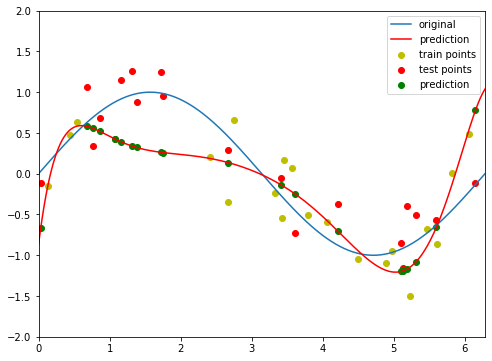

In [11]:
"""
linear regression using normal linear regression algorithm
and polinomial basis functions
"""

sinGen = Generator_2D(func, xRange).plot(label = "original", newFig = True)

xgen, ygen = sinGen.generateNoisyPoints(NTrainPoints, sigma = Nsigma)
plt.scatter(xgen, ygen, c = 'y', label = "train points")

xtest, ytest = sinGen.generateNoisyPoints(NTestPoints, sigma = Nsigma, seed = 100)
plt.scatter(xtest, ytest, c = 'r', label = "test points")

normalLR_polinomial = lr.LinearRegressor(basisFuncs, xgen, ygen).fit()

ypred_test = normalLR_polinomial.predict(xtest)
print("MSE test set = {}".format(normalLR_polinomial.meanSquareError(ytest)))

normalLR_polinomial.predict(xgen)
print("MSE train set = {}".format(normalLR_polinomial.meanSquareError(ygen)))

plt.scatter(xtest, ypred_test, c = 'g', label = "prediction")

xPredictLine = np.linspace(0, 4*np.pi, 500).reshape(-1, 1)
yPredictLine = normalLR_polinomial.predict(xPredictLine)

plt.plot(xPredictLine.ravel(), yPredictLine.ravel(), label = "prediction", c = 'r')
plt.ylim(-2, 2)
plt.legend()

MSE test set = 0.28122648154148877
MSE train set = 0.0757124505603016


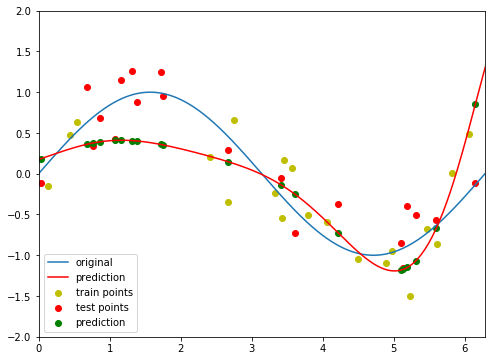

In [13]:
"""
linear regression using ridge linear regression algorithm
and polinomial basis functions
"""

sinGen = Generator_2D(func, xRange).plot(label = "original", newFig = True)

xgen, ygen = sinGen.generateNoisyPoints(NTrainPoints, sigma = Nsigma)
plt.scatter(xgen, ygen, c = 'y', label = "train points")

xtest, ytest = sinGen.generateNoisyPoints(NTestPoints, sigma = Nsigma, seed = 100)
plt.scatter(xtest, ytest, c = 'r', label = "test points")

ridgeLR_polinomial = lr.RidgeLinearRegressor(basisFuncs, xgen, ygen, lamb = 0.5).fit()

ypred_test = ridgeLR_polinomial.predict(xtest)
print("MSE test set = {}".format(ridgeLR_polinomial.meanSquareError(ytest)))

ridgeLR_polinomial.predict(xgen)
print("MSE train set = {}".format(ridgeLR_polinomial.meanSquareError(ygen)))

plt.scatter(xtest, ypred_test, c = 'g', label = "prediction")

xPredictLine = np.linspace(0, 4*np.pi, 500).reshape(-1, 1)
yPredictLine = ridgeLR_polinomial.predict(xPredictLine)

plt.plot(xPredictLine.ravel(), yPredictLine.ravel(), label = "prediction", c = 'r')
plt.ylim(-2, 2)
plt.legend()


-----------------------------------
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[5.77099935e+00]
 [3.22681973e+01]
 [1.59586817e+02]
 [7.81540839e+02]
 [3.83789252e+03]
 [1.89090421e+04]
 [9.33538368e+04]
 [4.60995467e+05]
 [2.27208785e+06]]
0.001
-----------------------------------
-----------------------------------
[[-5.77099935e-03]
 [-3.22681973e-02]
 [-1.59586817e-01]
 [-7.81540839e-01]
 [-3.83789252e+00]
 [-1.89090421e+01]
 [-9.33538368e+01]
 [-4.60995467e+02]
 [-2.27208785e+03]]
[[-1.53715922e+10]
 [-8.54817066e+10]
 [-4.79587418e+11]
 [-2.71018478e+12]
 [-1.54082232e+13]
 [-8.80530657e+13]
 [-5.05452001e+14]
 [-2.91290869e+15]
 [-1.68460510e+16]]
0.001
-----------------------------------
-----------------------------------
[[1.53715922e+07]
 [8.54817065e+07]
 [4.79587418e+08]
 [2.71018478e+09]
 [1.54082232e+10]
 [8.80530657e+10]
 [5.05452001e+11]
 [2.91290869e+12]
 [1.68460510e+13]]
[[1.13329277e+20]
 [6.30267167e+20]
 [3.53623809e+21]
 [1.99843758e+22]
 [1.1362114

/home/tuantran/JupyterNotebook/MachineLearning/LinearRegression/GradientDescent.py:30: RuntimeWarning: invalid value encountered in subtract
  self.x = np.subtract(self.x, self.eta*(self.diffFunction(self.x)))


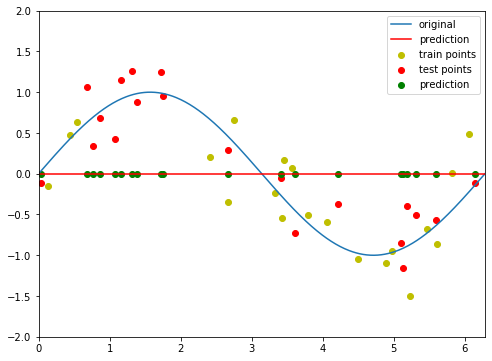

In [4]:
# NTrainPoints = 5
"""
linear regression using lasso linear regression algorithm
and polinomial basis functions
"""

sinGen = Generator_2D(func, xRange).plot(label = "original", newFig = True)

xgen, ygen = sinGen.generateNoisyPoints(NTrainPoints, sigma = Nsigma)
plt.scatter(xgen, ygen, c = 'y', label = "train points")

xtest, ytest = sinGen.generateNoisyPoints(NTestPoints, sigma = Nsigma, seed = 100)
plt.scatter(xtest, ytest, c = 'r', label = "test points")

ridgeLR_polinomial = lr.LassoLinearRegression(basisFuncs, xgen, ygen)
ridgeLR_polinomial.setGradParam(0.001, 0.01)
ridgeLR_polinomial.fit()

ypred_test = ridgeLR_polinomial.predict(xtest)
print("MSE test set = {}".format(ridgeLR_polinomial.meanSquareError(ytest)))

ridgeLR_polinomial.predict(xgen)
print("MSE train set = {}".format(ridgeLR_polinomial.meanSquareError(ygen)))

plt.scatter(xtest, ypred_test, c = 'g', label = "prediction")

xPredictLine = np.linspace(0, 4*np.pi, 500).reshape(-1, 1)
yPredictLine = ridgeLR_polinomial.predict(xPredictLine)

plt.plot(xPredictLine.ravel(), yPredictLine.ravel(), label = "prediction", c = 'r')
plt.ylim(-2, 2)
plt.legend()